In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head(5)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [5]:
dataset.drop(['Id'], axis = 1, inplace = True)

In [6]:
dataset.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 28 columns):
Age                        1628 non-null int64
Attrition                  1628 non-null int64
BusinessTravel             1628 non-null object
Department                 1628 non-null object
DistanceFromHome           1628 non-null int64
Education                  1628 non-null int64
EducationField             1628 non-null object
EmployeeNumber             1628 non-null int64
EnvironmentSatisfaction    1628 non-null int64
Gender                     1628 non-null object
JobInvolvement             1628 non-null int64
JobRole                    1628 non-null object
JobSatisfaction            1628 non-null int64
MaritalStatus              1628 non-null object
MonthlyIncome              1628 non-null int64
NumCompaniesWorked         1628 non-null int64
OverTime                   1628 non-null object
PercentSalaryHike          1628 non-null int64
PerformanceRating          1628 non-null

In [8]:
dataset.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

A few inferences - 
1. No missing values in the dataset (good news).
2. 7 non-numeric columns, not necessarily only 7 categorical features. 21 numeric columns.
3. 1628 training samples provided.

# Univariate Analysis

## Numerical Data Analysis

In [16]:
numeric_data = dataset.loc[:, dataset.dtypes != object]

In [77]:
def plot_distribution(data, feature, with_hue = False):
#     fig, ax = plt.subplots(figsize = (15, 10))
    if with_hue:
        grid = sns.FacetGrid(data, hue = 'Attrition', size = 10, aspect = 1)
    else:
        grid = sns.FacetGrid(data, size = 10, aspect = 1)
    grid = grid.map(sns.distplot, feature)
    if with_hue: plt.legend()

In [63]:
numeric_predictors = list(numeric_data.columns)
# Popping out Attrition - as it is not a predictor, rather the target
_ = numeric_predictors.pop(1)

Minimum Age: 18, Maximum Age: 60


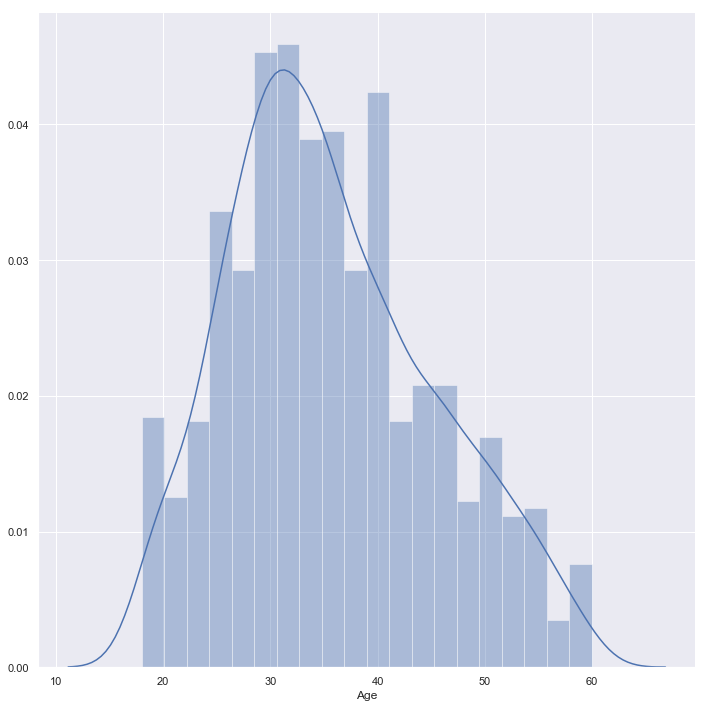

In [78]:
plot_distribution(numeric_data, numeric_predictors[0])
print('Minimum Age: {}, Maximum Age: {}'.format(min(numeric_data['Age']), max(numeric_data['Age'])))

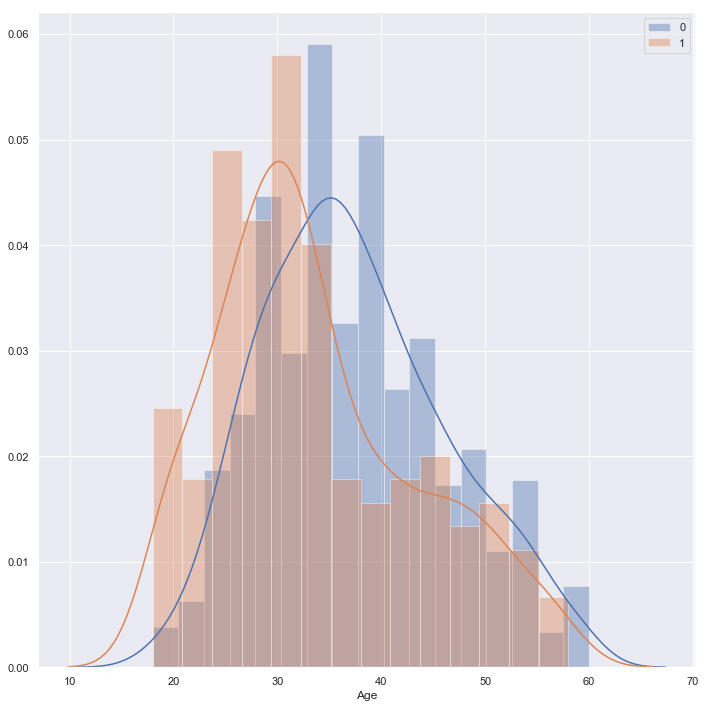

In [79]:
plot_distribution(numeric_data, numeric_predictors[0], with_hue = True)

The age variable ranges from 18 to 60, with a slight right right skewness. The mode is somewhere around 30 - 32 years of age.

On examining it separately for different values of Attrition, it can be seen that Age on itself is not such a huge predictor for Attrition. However, you can notice that for the rough range: 18 - 32, a higher proportion of people show the tendency of leaving the company. And, for the rough range 32 - 45, a higher proportion of people tend to retain the job they have.

This is actually quite natural - the first age group is the one where people tend to switch jobs more often than not, in order to increase the pay as much as they can while gathering the experience they need to get better pay. On the other hand, the second age group is one where people settle down and tend to take less risks with their lives.

Above the age of 45, it can be seen that equal proportion of people belong to both the classes. The attrition might be due to gender (women leaving their job early, just a hunch on day-to-day observations not any stereotype. I will try to justify/nullify the hunch with data), or due to health problems.

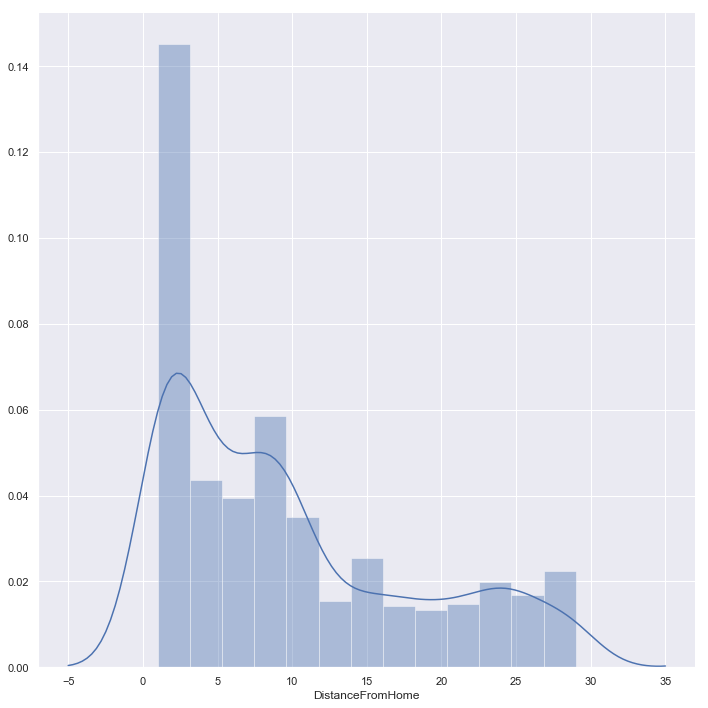

In [80]:
plot_distribution(numeric_data, numeric_predictors[1])

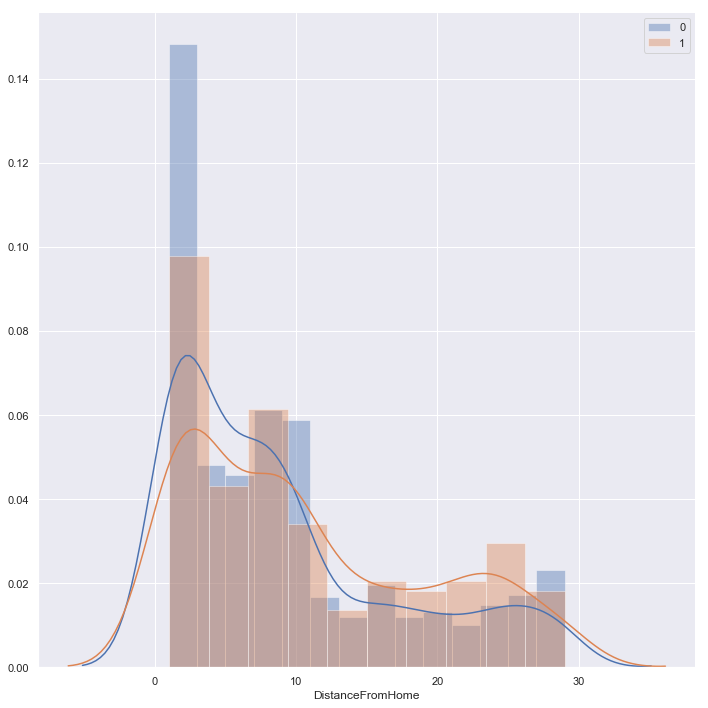

In [81]:
plot_distribution(numeric_data, numeric_predictors[1], with_hue = True)